In [1]:
from ete3 import Tree
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from simulate import simulate_shapes
from bridge_sampling.helper_functions import get_flat_values_sim


In [2]:
def generate_circle_landmarks(n_landmarks, radius=1.0, center_x=0.0, center_y=0.0, noise=0.0):
    """
    Generate landmarks equally spaced around a circle.
    
    Args:
        n_landmarks: Number of landmarks to generate
        radius: Radius of the circle
        center_x: X-coordinate of circle center
        center_y: Y-coordinate of circle center
        noise: Standard deviation of random noise to add (0 for perfect circle)
        
    Returns:
        Array of shape (n_landmarks*2,) with alternating x,y coordinates
    """
    # Generate angles equally spaced around the circle
    angles = np.linspace(0, 2 * np.pi, n_landmarks, endpoint=False)
    
    # Calculate x and y coordinates
    x_coords = center_x + radius * np.cos(angles)
    y_coords = center_y + radius * np.sin(angles)
    
    # Add random noise if specified
    if noise > 0:
        x_coords += np.random.normal(0, noise, n_landmarks)
        y_coords += np.random.normal(0, noise, n_landmarks)
    
    # Interleave x and y coordinates
    landmarks = np.zeros(n_landmarks * 2)
    landmarks[0::2] = x_coords
    landmarks[1::2] = y_coords
    
    return landmarks

In [3]:
#circle = generate_circle_landmarks(40)
#plt.plot(circle[0::2], circle[1::2], 'ro')

In [4]:
# load phylogeny 
tree = Tree('../data/chazot_subtree_rounded.nw')
print(tree)
# load root shape for simulation 
root = np.genfromtxt('../data/hercules_forewing_n=20.csv', delimiter=',')


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


In [5]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]
['niepelti', 'theseus', 'hercules', 'amphitryon', 'telemachus']


In [6]:
ds = np.random.randint(0, 2**32)
sigma = 0.7
alpha = 0.025
dt = 0.05
outputpath = f'exp_1_sigma={sigma}_alpha={alpha}_dt={dt}/seed={ds}'
os.makedirs(outputpath, exist_ok=True)
simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree, rb=0)
flat_true_tree = np.array(get_flat_values_sim(simtree)) 
flat_true_tree.shape
#

(9, 40)

In [7]:
np.savetxt(f'{outputpath}/flat_true_tree.csv', flat_true_tree, delimiter=",")

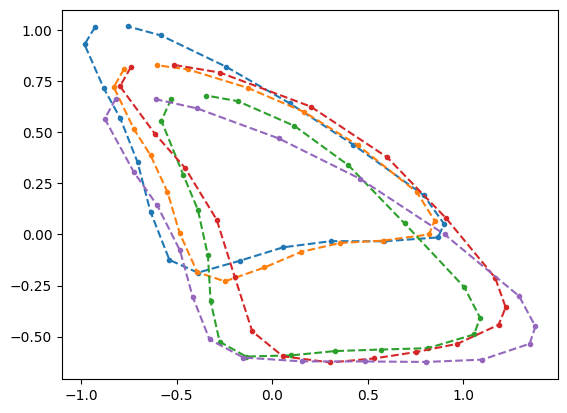

In [8]:
# show leaves 
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]
plt.savefig(f'{outputpath}/simulated_leaves.pdf', bbox_inches='tight')

In [9]:
leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
#leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
print(leaves)
#path = f'comparison/seed={ds}_sigma={sigma}_alpha={alpha}_dt={dt}'
#os.makedirs(path, exist_ok=True)
leaves.to_csv(f'{outputpath}/leaves.csv', index=False, header=False)
flat_true_tree_df = pd.DataFrame(flat_true_tree)
flat_true_tree_df.to_csv(f'{outputpath}/flat_true_tree.csv', index=False, header=False)

                  X0        Y0        X1        Y1        X2        Y2  \
niepelti   -0.927230  1.014469 -0.982131  0.929674 -0.881105  0.714751   
theseus    -0.775009  0.810461 -0.828960  0.720795 -0.723517  0.515086   
hercules   -0.527055  0.664453 -0.580030  0.557030 -0.464246  0.289456   
amphitryon -0.739854  0.817936 -0.796467  0.724958 -0.613025  0.491469   
telemachus -0.818593  0.663773 -0.876310  0.566351 -0.724736  0.306280   

                  X3        Y3        X4        Y4  ...       X15       Y15  \
niepelti   -0.794983  0.568492 -0.704504  0.353393  ...  0.425250  0.438930   
theseus    -0.636690  0.387520 -0.547908  0.207591  ...  0.450564  0.435361   
hercules   -0.389100  0.121501 -0.336139 -0.102684  ...  0.693254  0.053822   
amphitryon -0.455812  0.325438 -0.290314  0.072336  ...  0.911056  0.078725   
telemachus -0.601647  0.142078 -0.482527 -0.078380  ...  0.902710  0.000161   

                 X16       Y16       X17       Y17       X18       Y18  \
niepel